<a href="https://colab.research.google.com/github/rdwn354/Tensorflow_doc/blob/main/NLP/Multiple_LTSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)

tokenizer = info.features['text'].encoder

In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']

train_datasets = train_data.shuffle(BUFFER_SIZE)

train_datasets = train_datasets.padded_batch(BATCH_SIZE)
test_datasets = test_data.padded_batch(BATCH_SIZE)

In [5]:
import numpy as np
import tensorflow as tf

# Hyperparameters
batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'lstm output units: {lstm_dim}')

random_input = np.random.rand(batch_size, timesteps, features)
print(f'shape of input array: {random_input.shape}')

lstm = tf.keras.layers.LSTM(lstm_dim)
result = lstm(random_input)
print(f'shape of lstm output(return_sequences=False): {result.shape}')

lstm_rs = tf.keras.layers.LSTM(lstm_dim, return_sequences = True)
result = lstm_rs(random_input)
print(f'shape of lstm output(return_sequences=True): {result.shape}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 16
lstm output units: 8
shape of input array: (1, 20, 16)
shape of lstm output(return_sequences=False): (1, 8)
shape of lstm output(return_sequences=True): (1, 20, 8)


In [8]:
# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 128)         66048     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635329 (2.42 MB)
Trainable params: 63532

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [12]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_datasets, epochs=NUM_EPOCHS, validation_data=test_datasets)

Epoch 1/10
98/98 [==============================] - 65s 557ms/step - loss: 0.5711 - accuracy: 0.6990 - val_loss: 0.5671 - val_accuracy: 0.7228
Epoch 2/10
98/98 [==============================] - 48s 484ms/step - loss: 0.4603 - accuracy: 0.8124 - val_loss: 0.4870 - val_accuracy: 0.7840
Epoch 3/10
98/98 [==============================] - 47s 476ms/step - loss: 0.3676 - accuracy: 0.8481 - val_loss: 0.4652 - val_accuracy: 0.7963
Epoch 4/10
98/98 [==============================] - 53s 545ms/step - loss: 0.2881 - accuracy: 0.8892 - val_loss: 0.4403 - val_accuracy: 0.8218
Epoch 5/10
98/98 [==============================] - 52s 532ms/step - loss: 0.2336 - accuracy: 0.9135 - val_loss: 0.4359 - val_accuracy: 0.8272
Epoch 6/10
98/98 [==============================] - 42s 430ms/step - loss: 0.2179 - accuracy: 0.9189 - val_loss: 0.4319 - val_accuracy: 0.8223
Epoch 7/10
98/98 [==============================] - 52s 531ms/step - loss: 0.1765 - accuracy: 0.9377 - val_loss: 0.4722 - val_accuracy: 0.8233

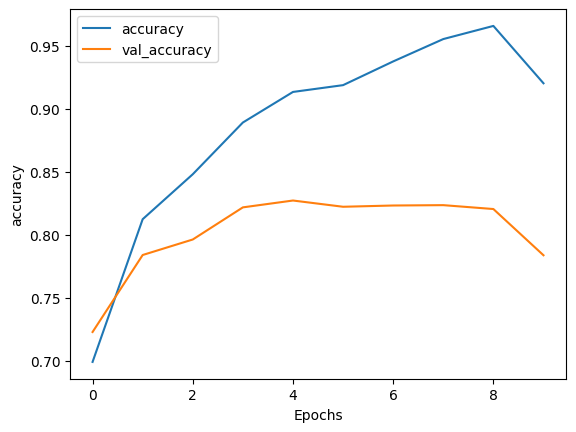

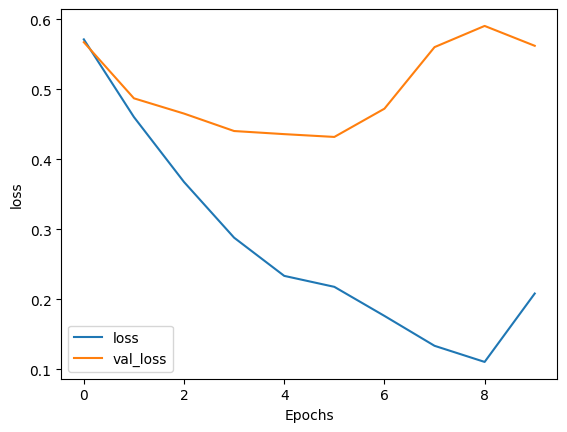

In [13]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")